# Implement Value at Risk & Conditional Value at Risk using:



    1. Historical Method
    2. Parametric Method (Variance-Covariance)
    3. Monte Carlo Method


In [1]:
## This is required for pandas_datareader on google colab - then you need to restart runtime
!pip install --upgrade pandas_datareader

In [13]:
# Import dependencies
import math
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf 
yf.pdr_override()
import pandas_datareader.data as pdr
from scipy.stats import norm, t

In [14]:
# Import data
def getData(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix

# Portfolio Performance
def portfolioPerformance(weights, meanReturns, covMatrix, Time):
    returns = np.sum(meanReturns*weights)*Time
    std = np.sqrt( np.dot(weights.T, np.dot(covMatrix, weights)) ) * np.sqrt(Time)
    return returns, std

stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock+'.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()

weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

returns['portfolio'] = returns.dot(weights)

[*********************100%%**********************]  6 of 6 completed


In [4]:
def historicalVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the percentile of the distribution at the given alpha confidence level
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

def historicalCVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the CVaR for dataframe / series
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= historicalVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalCVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

# 100 days
Time = 100

hVaR = -historicalVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
hCVaR = -historicalCVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
pRet, pStd = portfolioPerformance(weights, meanReturns, covMatrix, Time)

InitialInvestment = 10000
print('Expected Portfolio Return:      ', round(InitialInvestment*pRet,2))
print('Value at Risk 95th CI    :      ', round(InitialInvestment*hVaR,2))
print('Conditional VaR 95th CI  :      ', round(InitialInvestment*hCVaR,2))

Expected Portfolio Return:       228.7
Value at Risk 95th CI    :       1789.43
Conditional VaR 95th CI  :       2525.9


In [7]:
print(weights.T)

[0.36911743 0.2789004  0.28172579 0.01214346 0.01723278 0.04088014]


In [8]:
print(returns)

Ticker        BHP.AX    CBA.AX    NAB.AX    STO.AX    TLS.AX    WBC.AX  \
Date                                                                     
2022-02-22 -0.008914 -0.020899 -0.015610  0.032023 -0.010076 -0.012159   
2022-02-23  0.006066  0.006768 -0.004625  0.005642  0.022901  0.005518   
2022-02-24 -0.069231 -0.020478 -0.024892 -0.004208 -0.017413 -0.023639   
2022-02-25 -0.001787 -0.008764 -0.015997  0.007042 -0.002532 -0.012970   
2022-02-28  0.044081 -0.004474  0.001038  0.015385  0.005076 -0.000876   
...              ...       ...       ...       ...       ...       ...   
2024-04-23  0.001761  0.015060  0.013174 -0.003876 -0.002703  0.009328   
2024-04-24 -0.005934  0.003666  0.004728  0.005188 -0.005420  0.008471   
2024-04-26 -0.045987 -0.017478 -0.014412 -0.003871 -0.008174 -0.019091   
2024-04-29 -0.004172  0.007523  0.003283 -0.007772  0.005495  0.002725   
2024-04-30  0.004654  0.000176  0.000892  0.003916  0.001366  0.002717   

Ticker      portfolio  
Date         

In [9]:
print(meanReturns)

Ticker
BHP.AX    0.000158
CBA.AX    0.000333
NAB.AX    0.000236
STO.AX    0.000343
TLS.AX   -0.000105
WBC.AX    0.000218
dtype: float64


In [10]:
print(returns)

Ticker        BHP.AX    CBA.AX    NAB.AX    STO.AX    TLS.AX    WBC.AX  \
Date                                                                     
2022-02-22 -0.008914 -0.020899 -0.015610  0.032023 -0.010076 -0.012159   
2022-02-23  0.006066  0.006768 -0.004625  0.005642  0.022901  0.005518   
2022-02-24 -0.069231 -0.020478 -0.024892 -0.004208 -0.017413 -0.023639   
2022-02-25 -0.001787 -0.008764 -0.015997  0.007042 -0.002532 -0.012970   
2022-02-28  0.044081 -0.004474  0.001038  0.015385  0.005076 -0.000876   
...              ...       ...       ...       ...       ...       ...   
2024-04-23  0.001761  0.015060  0.013174 -0.003876 -0.002703  0.009328   
2024-04-24 -0.005934  0.003666  0.004728  0.005188 -0.005420  0.008471   
2024-04-26 -0.045987 -0.017478 -0.014412 -0.003871 -0.008174 -0.019091   
2024-04-29 -0.004172  0.007523  0.003283 -0.007772  0.005495  0.002725   
2024-04-30  0.004654  0.000176  0.000892  0.003916  0.001366  0.002717   

Ticker      portfolio  
Date         

In [11]:
print(returns['portfolio'])

Date
2022-02-22   -0.013798
2022-02-23    0.003512
2022-02-24   -0.039596
2022-02-25   -0.008099
2022-02-28    0.015554
                ...   
2024-04-23    0.008849
2024-04-24    0.000480
2024-04-26   -0.026878
2024-04-29    0.001595
2024-04-30    0.002201
Name: portfolio, Length: 551, dtype: float64


## Parametric VaR


Here we make an assumption on the distribution of returns and use the historical portfolio returns and standard deviations (estimates) to define parameters for the model. Here we have implemented two parametric VaR models:
 - normal distribution
 - t-distribution (fatter tails)

In [15]:
def var_parametric(portofolioReturns, portfolioStd, distribution='normal', alpha=5, dof=6):
    # because the distribution is symmetric
    if distribution == 'normal':
        VaR = norm.ppf(1-alpha/100)*portfolioStd - portofolioReturns
    elif distribution == 't-distribution':
        nu = dof
        VaR = np.sqrt((nu-2)/nu) * t.ppf(1-alpha/100, nu) * portfolioStd - portofolioReturns
    else:
        raise TypeError("Expected distribution type 'normal'/'t-distribution'")
    return VaR

def cvar_parametric(portofolioReturns, portfolioStd, distribution='normal', alpha=5, dof=6):
    if distribution == 'normal':
        CVaR = (alpha/100)**-1 * norm.pdf(norm.ppf(alpha/100))*portfolioStd - portofolioReturns
    elif distribution == 't-distribution':
        nu = dof
        xanu = t.ppf(alpha/100, nu)
        CVaR = -1/(alpha/100) * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu) * portfolioStd - portofolioReturns
    else:
        raise TypeError("Expected distribution type 'normal'/'t-distribution'")
    return CVaR

normVaR = var_parametric(pRet, pStd)
normCVaR = cvar_parametric(pRet, pStd)

tVaR = var_parametric(pRet, pStd, distribution='t-distribution')
tCVaR = cvar_parametric(pRet, pStd, distribution='t-distribution')

print("Normal VaR 95th CI       :      ", round(InitialInvestment*normVaR,2))
print("Normal CVaR 95th CI      :      ", round(InitialInvestment*normCVaR,2))
print("t-dist VaR 95th CI       :      ", round(InitialInvestment*tVaR,2))
print("t-dist CVaR 95th CI      :      ", round(InitialInvestment*tCVaR,2))

Normal VaR 95th CI       :       1449.09
Normal CVaR 95th CI      :       1875.32
t-dist VaR 95th CI       :       1389.67
t-dist CVaR 95th CI      :       1970.64


## Monte Carlo VaR & CVaR


In this section we use a Monte Carlo simulation of a stock portfolio and then use the functions for historical VaR and CVaR to calculate our risk parameters.

The main advantage here is we could define individual models/stock dynamics for individual assets. This can be very powerful!

In [16]:
# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

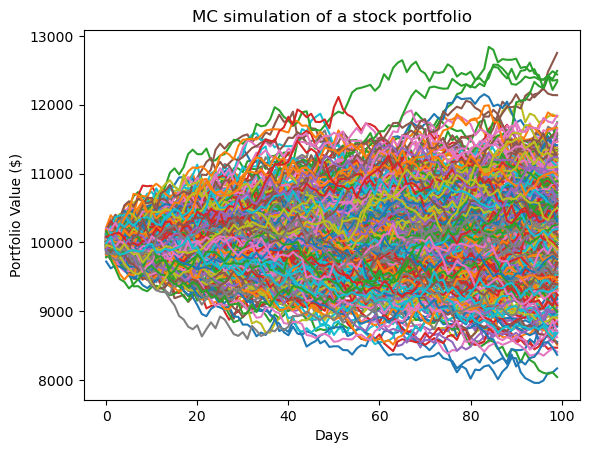

In [17]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [18]:
def mcVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: percentile on return distribution to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

def mcCVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: CVaR or Expected Shortfall to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError("Expected a pandas data series.")

In [19]:
portResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portResults, alpha=5)
CVaR = initialPortfolio - mcCVaR(portResults, alpha=5)

print('VaR ${}'.format(round(VaR,2)))
print('CVaR ${}'.format(round(CVaR,2)))

VaR $1148.63
CVaR $1404.98


In [20]:
print("\nVaR:")

print(' historical VaR 95th CI   :      ', round(InitialInvestment*hVaR,2))
print(" Normal VaR 95th CI       :      ", round(InitialInvestment*normVaR,2))
print(" t-dist VaR 95th CI       :      ", round(InitialInvestment*tVaR,2))
print(" MC VaR  95th CI          :      ", round(VaR,2))


print("\nCVaR:")

print(' historical CVaR 95th CI  :      ', round(InitialInvestment*hCVaR,2))
print(" Normal CVaR 95th CI      :      ", round(InitialInvestment*normCVaR,2))
print(" t-dist CVaR 95th CI      :      ", round(InitialInvestment*tCVaR,2))
print(" MC CVaR 95th CI          :      ", round(CVaR,2))


VaR:
 historical VaR 95th CI   :       1789.43
 Normal VaR 95th CI       :       1449.09
 t-dist VaR 95th CI       :       1389.67
 MC VaR  95th CI          :       1148.63

CVaR:
 historical CVaR 95th CI  :       2525.9
 Normal CVaR 95th CI      :       1875.32
 t-dist CVaR 95th CI      :       1970.64
 MC CVaR 95th CI          :       1404.98
